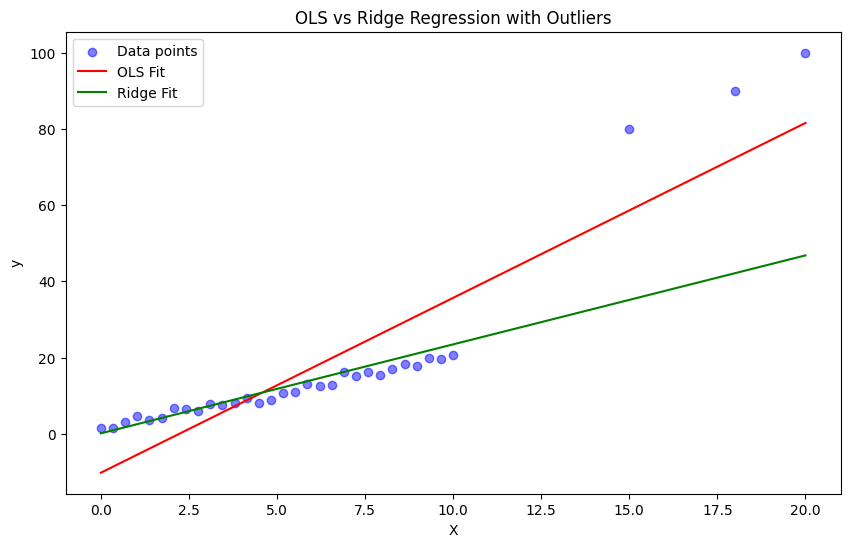

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate a simple linear dataset
n_samples = 30
X_input = np.linspace(0, 10, n_samples)
y = 2 * X_input + 1 + np.random.randn(n_samples) # True slope=2, intercept=1, some noise

# Add three impactful outliers
X_input = np.append(X_input, [15, 18, 20]) # Far away in the x-direction
y = np.append(y, [80, 90, 100])

# Add the intercept term
X = np.hstack([np.ones((n_samples + 3, 1)), X_input.reshape(-1, 1)])

# Compute the OLS and ridge regression solutions
beta_OLS = np.linalg.inv(X.T @ X) @ X.T @ y
lambda_ridge = 1000 # Large regularization parameter
I = np.eye(X.shape[1])
beta_ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y

# Prepare to plot
plt.figure(figsize=(10, 6))
plt.scatter(X_input, y, color='blue', alpha=0.5, label='Data points')

# Plot OLS fit
x_range = np.linspace(np.min(X_input), np.max(X_input), 100)
y_OLS = beta_OLS[0] + beta_OLS[1] * x_range
plt.plot(x_range, y_OLS, color='red', label='OLS Fit')

# Plot Ridge fit
y_ridge = beta_ridge[0] + beta_ridge[1] * x_range
plt.plot(x_range, y_ridge, 'g-', label='Ridge Fit')

plt.xlabel('X')
plt.ylabel('y')
plt.title('OLS vs Ridge Regression with Outliers')
plt.legend()
plt.show()


Non inverable example

In [6]:
import plotly.graph_objects as go

X = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
y = np.array([5, 9, 13, 17])

# Add intercept term
X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

# Ridge regression solution
lambda_ridge = 0.1
I = np.eye(X_with_intercept.shape[1])
beta_ridge = np.linalg.inv(X_with_intercept.T @ X_with_intercept + lambda_ridge * I) @ X_with_intercept.T @ y

# Create grid for plotting
x1_range = np.linspace(0, 5, 20)
x2_range = 2 * x1_range
X1_mesh, X2_mesh = np.meshgrid(x1_range, x2_range)
Y_mesh = beta_ridge[0] + beta_ridge[1] * X1_mesh + beta_ridge[2] * X2_mesh

# Plotting
fig = go.Figure(data=[go.Scatter3d(x=X[:, 0], y=X[:, 1], z=y, mode='markers', marker=dict(size=5, color='red')),
                      go.Surface(x=X1_mesh, y=X2_mesh, z=Y_mesh, opacity=0.5)])
fig.update_layout(scene=dict(
        xaxis_title='X1', 
        yaxis_title='X2', 
        zaxis_title='y'),
        title='Ridge Regression Plane in 3D')

fig.show()